In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

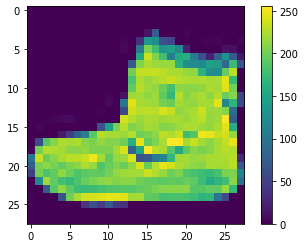

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

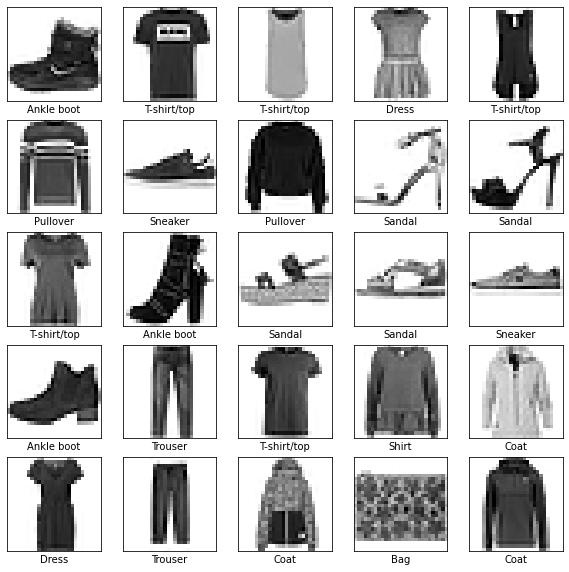

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
#tworzenie modelu
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

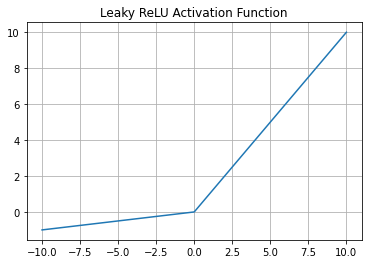

In [11]:
# LeakyRelu function
def leaky_relu(x, alpha=0.1):
    return np.maximum(alpha*x, x)

# Generating a set of numbers
x_vals = np.linspace(-10, 10, 500)

# Passing the numbers through the LeakyRelu function
y_vals = leaky_relu(x_vals)

# Plotting the data
plt.figure()
plt.plot(x_vals, y_vals)
plt.title("Leaky ReLU Activation Function")
plt.grid(True)
plt.show()

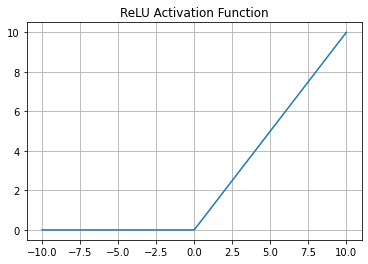

In [12]:
# ReLU function
def relu(x):
    return np.maximum(0, x)

# Generating a set of numbers
x_vals = np.linspace(-10, 10, 500)

# Passing the numbers through the relu function
y_vals = relu(x_vals)

# Plotting the data
plt.figure()
plt.plot(x_vals, y_vals)
plt.title("ReLU Activation Function")
plt.grid(True)
plt.show()

In [14]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2305 - accuracy: 0.9139
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2217 - accuracy: 0.9178
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2143 - accuracy: 0.9200
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2085 - accuracy: 0.9220
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2049 - accuracy: 0.9227
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1970 - accuracy: 0.9269
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1959 - accuracy: 0.9251
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1879 - accuracy: 0.9292
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1848 - accuracy: 0.9302
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.179

In [15]:
#ocena modelu
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f'strata: {test_loss}, dokładnośc: {test_acc}')

313/313 - 1s - loss: 0.3653 - accuracy: 0.8834 - 581ms/epoch - 2ms/step
strata: 0.3652733564376831, dokładnośc: 0.883400022983551


In [16]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [18]:
predictions[0]

array([2.7155933e-15, 6.3051289e-13, 1.6160939e-10, 5.3457524e-15,
 9.5857003e-13, 2.3976936e-04, 1.4715776e-09, 2.4215881e-04,
 9.2851077e-10, 9.9951798e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9